In [ ]:
# Andrew Dunn, Katherine Dumais, Kathryn Link-Oberstar, Lee-Or Bentovim
# Summary of initial feature engineering and model testing for checkpoint 2

# This analysis runs after we load, clean, and generate additional variables in load_data.py, 
# and initially explored the data in exploratory_analysis.ipynb.

In [24]:
# Import libraries and data
import numpy as np
import load_data as ld
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, classification_report, precision_recall_fscore_support, balanced_accuracy_score
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from evaluate_classification import evaluate_classification

**Feature Engineering**

We generate several new variables, derived from our literature review, in load_data.py:

- max_education_level: the education level of the person with the highest education level in the household
- hh_has_marriage: whether someone in the household is married
- hh_max_age: the age of the oldest person in the household
- hh_sex_ratio: the ratio of men to women in the household
- hh_child_woman_ratio_12: the ratio of children to women in the household, with children defined as being under 12
- hh_child_adult_ratio_12: the ratio of children to adults in the household, with children defined as being under 12
- hh_child_woman_ratio_19: the ratio of children to women in the household, with children defined as being under 19
- hh_child_adult_ratio_19: the ratio of children to adults in the household, with children defined as being under 19
- v2a1_log: the logged value of v2a1, the monthly rent payment. We also estimate and impute values into v2a1 when that field is missing.

**Model Testing**

We tested variations of four different models: random forest, naive bayes, KNN, and logistic regression in the following notebooks:

Below, we demonstrate the best performing variants of those models.

In [25]:
# Random Forest

#### Naive Bayes

The Naive Bayes algorithm assumes that all features are independent of each other, meaning that the presence or absence of one feature does not affect the probability of another feature being present or absent. The algorithm uses Bayes' theorem to calculate the probabilities of different classes given the observed evidence. 

The Naive Bayes model is Scalable, can handle large datasets and high-dimensional feature spaces efficiently. However, one of the key assumptions of Naive Bayes is that features are conditionally independent given the class label. *This is almost certainly not true with this data.* 
Some other imitation of Naive Bayes include:
* *Data Scarcity*: Naive Bayes models can suffer when there is not enough data to estimate the probabilities accurately
* *Continuous features:* Naive Bayes models work better with categorical data. *We have a lot of bianry and continuous data*
* *Imbalanced Datasets*: Naive Bayes models may not perform well on an imbalanced dataset, where the classes are not represented equally. This can lead to poor classification performance, as the Naive Bayes algorithm may be biased towards the majority class.

**MinMaxScalar on Multinomial Naive Bayes**

In [26]:
scaler = MinMaxScaler()
df, X_valid, y_valid = ld.load_train_data()
X = df.iloc[:, :-1]
y = df.loc[:, 'Target']
X_true = X_valid
y_true = y_valid

Accuracy: 0.65
F1 Score: 0.62
Recall: Label 1: 0.29 Label 2: 0.4 Label 3: 0.14 Label 4: 0.86


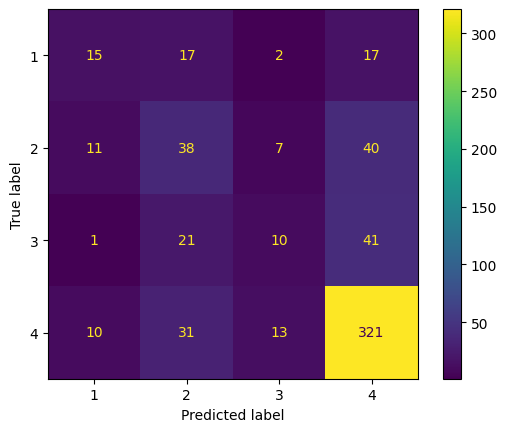

In [27]:
X_scaled = scaler.fit_transform(X)
nb = MultinomialNB()
nb.fit(X_scaled, y)
X_valid_scaled = scaler.transform(X_valid)
y_pred = nb.predict(X_valid_scaled)
evaluate_classification(y_pred, y_true,  cm=True)


**Complement Naive Bayes + MinMaxScalar**

Accuracy: 0.61
F1 Score: 0.59
Recall: Label 1: 0.0 Label 2: 0.57 Label 3: 0.1 Label 4: 0.79


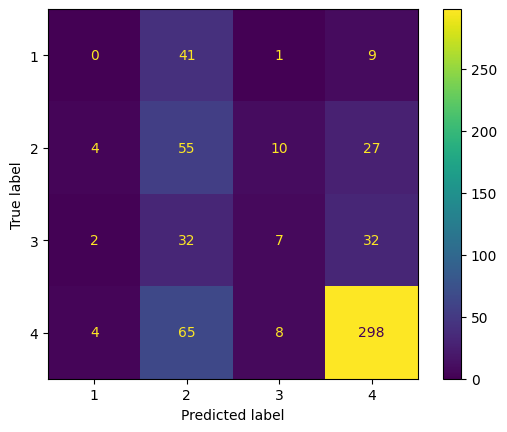

In [28]:
X_scaled = scaler.fit_transform(X)
nb = ComplementNB()
nb.fit(X_scaled, y)
X_valid_scaled = scaler.transform(X_valid)
y_pred = nb.predict(X_valid_scaled)
evaluate_classification(y_pred, y_true, cm = True)

In general, the Naive Bayes Model performed with between 50% and 60% accuracy on training data across various iterations of the model.

Main Takeaways: 
* The model with the best accuracy was the **Bernoulli Naive Bayes with MinMaxScalar**. It had 65% accuracy, and even this model is one of the best performing, its accuracy is primarily due to the fact that it classfies 4, our over represented class, well. The recall values for this model are. Label 1: 0.29 Label 2: 0.4 Label 3: 0.14 Label 4: 0.86
* One of the biggest challenged we face in this project is figuring out how to handle the overrepresenation of group 4 in our data. Models that classfiy most data as 4 (the over represented class) may return higher accuracy but may be overall less useful. 
    * In general, models seemed to behave in 1 of 2 ways:
        1. Classifying most values as 4 (i.e. the *Bernoulli Naive Bayes with MinMaxScalar* above), or
        2. Split values between 2 and 4 (i.e. *Complement Naive Bayes + MinMaxScalar*)
    * **Complement Naive Bayes + MinMaxScalar**: This model has some of the highest accuracy of all the Naive Bayes Models (61%) and is also the best model classfiying 2: Recall: Label 1: 0.0 Label 2: 0.57 Label 3: 0.1 Label 4: 0.79
* Overall, MinMaxScalar seemed to be an important step to improve accuracy across the board.

In [29]:
# KNN

In [30]:
# Logistic Regression

** Discussion **